# PART OF THE TEMPLATE

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from dpp.data import load_from_kaggle

c:\Users\Eyyub\Desktop\StackFuel\PortfolioProjekt\DPP-Stackfuel-Data-Science-Projekt\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset_link = "alphiree/cardiovascular-diseases-risk-prediction-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\cardiovascular-diseases-risk-prediction-dataset' already exists with files. Skipping download (replace=False).


In [4]:
files

['CVD_cleaned.csv']

In [5]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), delimiter=",")
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [6]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2),
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(308854, 19)

'Description'

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.00,308854.00,308854.00,308854.0,308854.00,308854.00,308854.00
mean,170.62,83.59,28.63,5.1,29.84,15.11,6.30
std,10.66,21.34,6.52,8.2,24.88,14.93,8.58
min,91.00,24.95,12.02,0.0,0.00,0.00,0.00
25%,163.00,68.04,24.21,0.0,12.00,4.00,2.00
50%,170.00,81.65,27.44,1.0,30.00,12.00,4.00
75%,178.00,95.25,31.85,6.0,30.00,20.00,8.00
max,241.00,293.02,99.33,30.0,120.00,128.00,128.00


'Duplicates'

np.int64(80)

,Data Types,Missing Values,Unique Values,Sample Values
General_Health,object,0,5,"[Good, Good, Excellent]"
Checkup,object,0,5,"[Within the past year, Within the past year, W..."
Exercise,object,0,2,"[Yes, No, No]"
Heart_Disease,object,0,2,"[No, No, No]"
Skin_Cancer,object,0,2,"[No, No, No]"
Other_Cancer,object,0,2,"[No, No, No]"
Depression,object,0,2,"[No, Yes, Yes]"
Diabetes,object,0,4,"[Yes, but female told only during pregnancy, N..."
Arthritis,object,0,2,"[No, Yes, No]"
Sex,object,0,2,"[Female, Female, Female]"


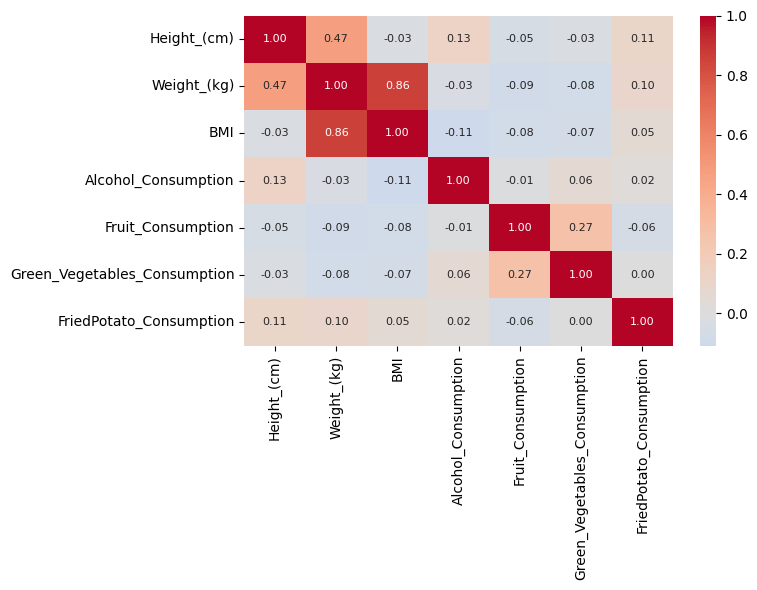

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0,
            annot_kws={"size": 8}, fmt='.2f')  # Kleinere Schrift + 2 Dezimalstellen
plt.tight_layout()
plt.show()

# ===========================================

# ===========================================

#  OWN PART BEGINS HERE

# Exploration of Data

## Imports

In [8]:
# =============================================================================
# 1. IMPORTS & SETUP
# =============================================================================

import pandas as pd
import numpy as np  # noqa: F811
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configuration
warnings.filterwarnings('ignore')
#plt.style.use('seaborn-v0_8')
#sns.set_palette("husl")

# Plot settings
#plt.rcParams['figure.figsize'] = (12, 8)
#plt.rcParams['font.size'] = 11

## Load Data & Initial Inspection

In [9]:
# =============================================================================
# 2. DATA LOADING & INITIAL INSPECTION
# =============================================================================

# Load dataset
dataset_link = "alphiree/cardiovascular-diseases-risk-prediction-dataset"
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]), sep=",")

print(f"Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns")
print("\n" + "="*60)

# Display first 5 rows
print("First 5 rows:")
display(df.head())

Destination directory '../data/raw\cardiovascular-diseases-risk-prediction-dataset' already exists with files. Skipping download (replace=False).
Dataset loaded: 308,854 rows, 19 columns

First 5 rows:


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [10]:
# Basic information
print("DATASET INFO:")
print("="*40)
df.info()

print("\nSHAPE:")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   

In [11]:
# Column names and data types
print("COLUMNS & DATA TYPES:")
print("="*40)
for col in df.columns:
    print(f"{col:15} | {str(df[col].dtype):10} | Unique: {df[col].nunique():4}")

COLUMNS & DATA TYPES:
General_Health  | object     | Unique:    5
Checkup         | object     | Unique:    5
Exercise        | object     | Unique:    2
Heart_Disease   | object     | Unique:    2
Skin_Cancer     | object     | Unique:    2
Other_Cancer    | object     | Unique:    2
Depression      | object     | Unique:    2
Diabetes        | object     | Unique:    4
Arthritis       | object     | Unique:    2
Sex             | object     | Unique:    2
Age_Category    | object     | Unique:   13
Height_(cm)     | float64    | Unique:   99
Weight_(kg)     | float64    | Unique:  525
BMI             | float64    | Unique: 3654
Smoking_History | object     | Unique:    2
Alcohol_Consumption | float64    | Unique:   31
Fruit_Consumption | float64    | Unique:   77
Green_Vegetables_Consumption | float64    | Unique:   75
FriedPotato_Consumption | float64    | Unique:   69


## Data Type Correction & Feature Categorization

In [13]:
# =============================================================================
# 3. DATA TYPE CORRECTION & FEATURE CATEGORIZATION
# =============================================================================

print("CORRECTING DATA TYPES:")
print("="*40)

# Define correct data types based on BRFSS documentation
dtype_mapping = {
    # Demographic Features
    'General_Health': 'category',      # Self-rated health status
    'Checkup': 'category',             # Last checkup time
    'Exercise': 'category',            # Physical activity
    'Skin_Cancer': 'category',         # Skin cancer history
    'Other_Cancer': 'category',        # Other cancer history
    'Depression': 'category',          # Depression diagnosis
    'Diabetes': 'category',            # Diabetes status
    'Arthritis': 'category',           # Arthritis diagnosis
    'Sex': 'category',                 # Biological sex
    'Age_Category': 'category',        # Age group
    'Height_(cm)': 'float32',          # Height in cm
    'Weight_(kg)': 'float32',          # Weight in kg
    'BMI': 'float32',                  # Body Mass Index
    'Smoking_History': 'category',     # Smoking status
    'Alcohol_Consumption': 'float32',  # Alcohol drinks per month
    'Fruit_Consumption': 'float32',    # Fruit servings per month
    'Green_Vegetables_Consumption': 'float32',  # Vegetable servings per month
    'FriedPotato_Consumption': 'float32',       # Fried potato servings per month
    
    # Target Variable
    'Heart_Disease': 'category'        # Cardiovascular disease diagnosis
}

# Apply data type conversions
print("Before conversion:")
print(df.dtypes)
print("\n" + "-"*40 + "\n")

for col, dtype in dtype_mapping.items():
    if col in df.columns:
        try:
            df[col] = df[col].astype(dtype) # pyright: ignore[reportArgumentType, reportCallIssue]
            print(f"{col:35} → {dtype}")
        except Exception as e:
            print(f"{col:35} → {dtype} (failed: {e})")

print("\n" + "-"*40 + "\n")
print("After conversion:")
print(df.dtypes)

CORRECTING DATA TYPES:
Before conversion:
General_Health                  category
Checkup                         category
Exercise                        category
Heart_Disease                   category
Skin_Cancer                     category
Other_Cancer                    category
Depression                      category
Diabetes                        category
Arthritis                       category
Sex                             category
Age_Category                    category
Height_(cm)                      float32
Weight_(kg)                      float32
BMI                              float32
Smoking_History                 category
Alcohol_Consumption              float32
Fruit_Consumption                float32
Green_Vegetables_Consumption     float32
FriedPotato_Consumption          float32
dtype: object

----------------------------------------

General_Health                      → category
Checkup                             → category
Exercise                    

In [14]:
# Feature categorization for documentation
feature_categories = {
    'Health Status': ['General_Health', 'Checkup'],
    'Lifestyle Factors': ['Exercise', 'Smoking_History', 'Alcohol_Consumption'],
    'Dietary Factors': ['Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
    'Chronic Conditions': ['Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis'],
    'Physical Measurements': ['Height_(cm)', 'Weight_(kg)', 'BMI'],
    'Demographics': ['Sex', 'Age_Category'],
    'Target Variable': ['Heart_Disease']
}

print("\nFEATURE CATEGORIZATION:")
print("="*40)
for category, features in feature_categories.items():
    print(f"\n{category}:")
    for feature in features:
        if feature in df.columns:
            print(f"  • {feature:35} | dtype: {df[feature].dtype}")

# Memory usage
#print("\nMEMORY USAGE:")
#print("="*40)
#memory_usage = df.memory_usage(deep=True).sum() / 1024**2
#print(f"Total memory usage: {memory_usage:.2f} MB")


FEATURE CATEGORIZATION:

Health Status:
  • General_Health                      | dtype: category
  • Checkup                             | dtype: category

Lifestyle Factors:
  • Exercise                            | dtype: category
  • Smoking_History                     | dtype: category
  • Alcohol_Consumption                 | dtype: float32

Dietary Factors:
  • Fruit_Consumption                   | dtype: float32
  • Green_Vegetables_Consumption        | dtype: float32
  • FriedPotato_Consumption             | dtype: float32

Chronic Conditions:
  • Skin_Cancer                         | dtype: category
  • Other_Cancer                        | dtype: category
  • Depression                          | dtype: category
  • Diabetes                            | dtype: category
  • Arthritis                           | dtype: category

Physical Measurements:
  • Height_(cm)                         | dtype: float32
  • Weight_(kg)                         | dtype: float32
  • BMI     

In [15]:
# Basic information
print("\nDATASET INFO:")
print("="*40)
df.info()

print("\nSHAPE:")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")


DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   General_Health                308854 non-null  category
 1   Checkup                       308854 non-null  category
 2   Exercise                      308854 non-null  category
 3   Heart_Disease                 308854 non-null  category
 4   Skin_Cancer                   308854 non-null  category
 5   Other_Cancer                  308854 non-null  category
 6   Depression                    308854 non-null  category
 7   Diabetes                      308854 non-null  category
 8   Arthritis                     308854 non-null  category
 9   Sex                           308854 non-null  category
 10  Age_Category                  308854 non-null  category
 11  Height_(cm)                   308854 non-null  float32 
 12  Weight_(kg)    

In [16]:
# Column names and data types
print("COLUMNS & DATA TYPES:")
print("="*40)
for col in df.columns:
    print(f"{col:35} | {str(df[col].dtype):10} | Unique: {df[col].nunique():6}")

COLUMNS & DATA TYPES:
General_Health                      | category   | Unique:      5
Checkup                             | category   | Unique:      5
Exercise                            | category   | Unique:      2
Heart_Disease                       | category   | Unique:      2
Skin_Cancer                         | category   | Unique:      2
Other_Cancer                        | category   | Unique:      2
Depression                          | category   | Unique:      2
Diabetes                            | category   | Unique:      4
Arthritis                           | category   | Unique:      2
Sex                                 | category   | Unique:      2
Age_Category                        | category   | Unique:     13
Height_(cm)                         | float32    | Unique:     99
Weight_(kg)                         | float32    | Unique:    525
BMI                                 | float32    | Unique:   3654
Smoking_History                     | category   | Uni

## Missing Values & Data Quality

In [17]:
# =============================================================================
# 4. MISSING VALUES & DATA QUALITY
# =============================================================================

print("MISSING VALUES ANALYSIS:")
print("="*40)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df)) * 100
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    display(missing_data)
else:
    print("No missing values found!")

MISSING VALUES ANALYSIS:
No missing values found!


In [18]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"DUPLICATES: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

if duplicates > 0:
    print("Duplicates found. Should be handled in preprocessing")

DUPLICATES: 80 (0.03%)
Duplicates found. Should be handled in preprocessing


## Target Variable Analysis

TARGET VARIABLE ANALYSIS (Heart_Disease):
Absolute frequencies:
  Heart_Disease = No: 283,883 (91.9%)
  Heart_Disease = Yes: 24,971 (8.1%)


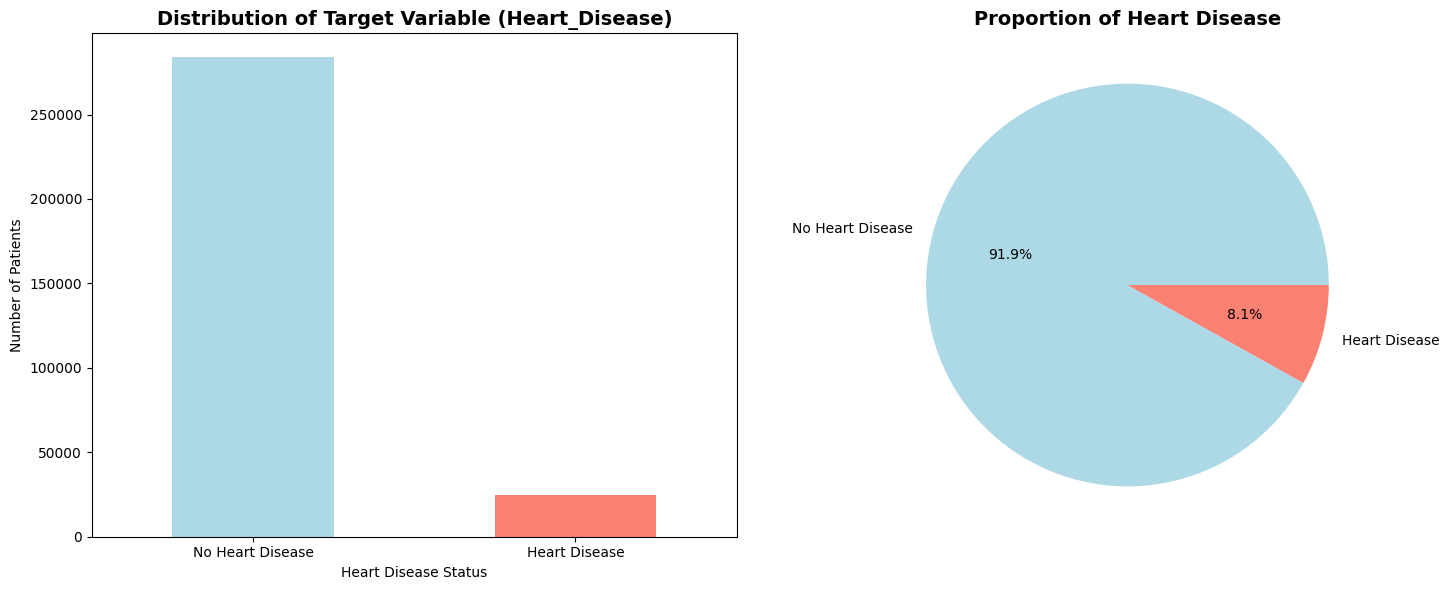


Class Balance Ratio: 0.088
Class imbalance detected - should be considered during modeling


In [19]:
# =============================================================================
# 5. TARGET VARIABLE ANALYSIS
# =============================================================================

print("TARGET VARIABLE ANALYSIS (Heart_Disease):")
print("="*40)

# Distribution of target variable
target_counts = df['Heart_Disease'].value_counts()
target_props = df['Heart_Disease'].value_counts(normalize=True)

print("Absolute frequencies:")
for val, count in target_counts.items():
    print(f"  Heart_Disease = {val}: {count:,} ({target_props[val]*100:.1f}%)") # pyright: ignore[reportCallIssue, reportArgumentType]

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
target_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'salmon'])
ax1.set_title('Distribution of Target Variable (Heart_Disease)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Heart Disease Status')
ax1.set_ylabel('Number of Patients')
ax1.set_xticklabels(['No Heart Disease', 'Heart Disease'], rotation=0)

# Pie chart
ax2.pie(target_counts.values, labels=['No Heart Disease', 'Heart Disease'], 
        autopct='%1.1f%%', colors=['lightblue', 'salmon'])
ax2.set_title('Proportion of Heart Disease', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Class imbalance check
imbalance_ratio = target_counts.min() / target_counts.max()
print(f"\nClass Balance Ratio: {imbalance_ratio:.3f}")
if imbalance_ratio < 0.8:
    print("Class imbalance detected - should be considered during modeling")
else:
    print("Well-balanced classes")

## Descriptive Statistics

In [20]:
# =============================================================================
# 6. DESCRIPTIVE STATISTICS
# =============================================================================

print("DESCRIPTIVE STATISTICS:")
print("="*50)

# Numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Numeric variables:")
display(df[numeric_cols].describe().round(2))

DESCRIPTIVE STATISTICS:
Numeric variables:


,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.00,308854.00,308854.00,308854.0,308854.00,308854.00,308854.00
mean,170.62,83.59,28.63,5.1,29.84,15.11,6.30
std,10.66,21.34,6.52,8.2,24.88,14.93,8.58
min,91.00,24.95,12.02,0.0,0.00,0.00,0.00
25%,163.00,68.04,24.21,0.0,12.00,4.00,2.00
50%,170.00,81.65,27.44,1.0,30.00,12.00,4.00
75%,178.00,95.25,31.85,6.0,30.00,20.00,8.00
max,241.00,293.02,99.33,30.0,120.00,128.00,128.00


In [21]:
# Categorical variables
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()

if categorical_cols:
    print("\nCATEGORICAL VARIABLES:")
    for col in categorical_cols:
        if col != 'Heart_Disease':  # Target variable already analyzed
            print(f"\n{col.upper()}:")
            value_counts = df[col].value_counts()
            for val, count in value_counts.items():
                print(f"  {val}: {count:,} ({count/len(df)*100:.1f}%)")


CATEGORICAL VARIABLES:

GENERAL_HEALTH:
  Very Good: 110,395 (35.7%)
  Good: 95,364 (30.9%)
  Excellent: 55,954 (18.1%)
  Fair: 35,810 (11.6%)
  Poor: 11,331 (3.7%)

CHECKUP:
  Within the past year: 239,371 (77.5%)
  Within the past 2 years: 37,213 (12.0%)
  Within the past 5 years: 17,442 (5.6%)
  5 or more years ago: 13,421 (4.3%)
  Never: 1,407 (0.5%)

EXERCISE:
  Yes: 239,381 (77.5%)
  No: 69,473 (22.5%)

SKIN_CANCER:
  No: 278,860 (90.3%)
  Yes: 29,994 (9.7%)

OTHER_CANCER:
  No: 278,976 (90.3%)
  Yes: 29,878 (9.7%)

DEPRESSION:
  No: 246,953 (80.0%)
  Yes: 61,901 (20.0%)

DIABETES:
  No: 259,141 (83.9%)
  Yes: 40,171 (13.0%)
  No, pre-diabetes or borderline diabetes: 6,896 (2.2%)
  Yes, but female told only during pregnancy: 2,646 (0.9%)

ARTHRITIS:
  No: 207,783 (67.3%)
  Yes: 101,071 (32.7%)

SEX:
  Female: 160,196 (51.9%)
  Male: 148,658 (48.1%)

AGE_CATEGORY:
  65-69: 33,434 (10.8%)
  60-64: 32,418 (10.5%)
  70-74: 31,103 (10.1%)
  55-59: 28,054 (9.1%)
  50-54: 25,097 (8.1%)

## Age Analysis

AGE CATEGORY ANALYSIS:
Age distribution:
  18-24: 18,681 (6.0%)
  25-29: 15,494 (5.0%)
  30-34: 18,428 (6.0%)
  35-39: 20,606 (6.7%)
  40-44: 21,595 (7.0%)
  45-49: 20,968 (6.8%)
  50-54: 25,097 (8.1%)
  55-59: 28,054 (9.1%)
  60-64: 32,418 (10.5%)
  65-69: 33,434 (10.8%)
  70-74: 31,103 (10.1%)
  75-79: 20,705 (6.7%)
  80+: 22,271 (7.2%)


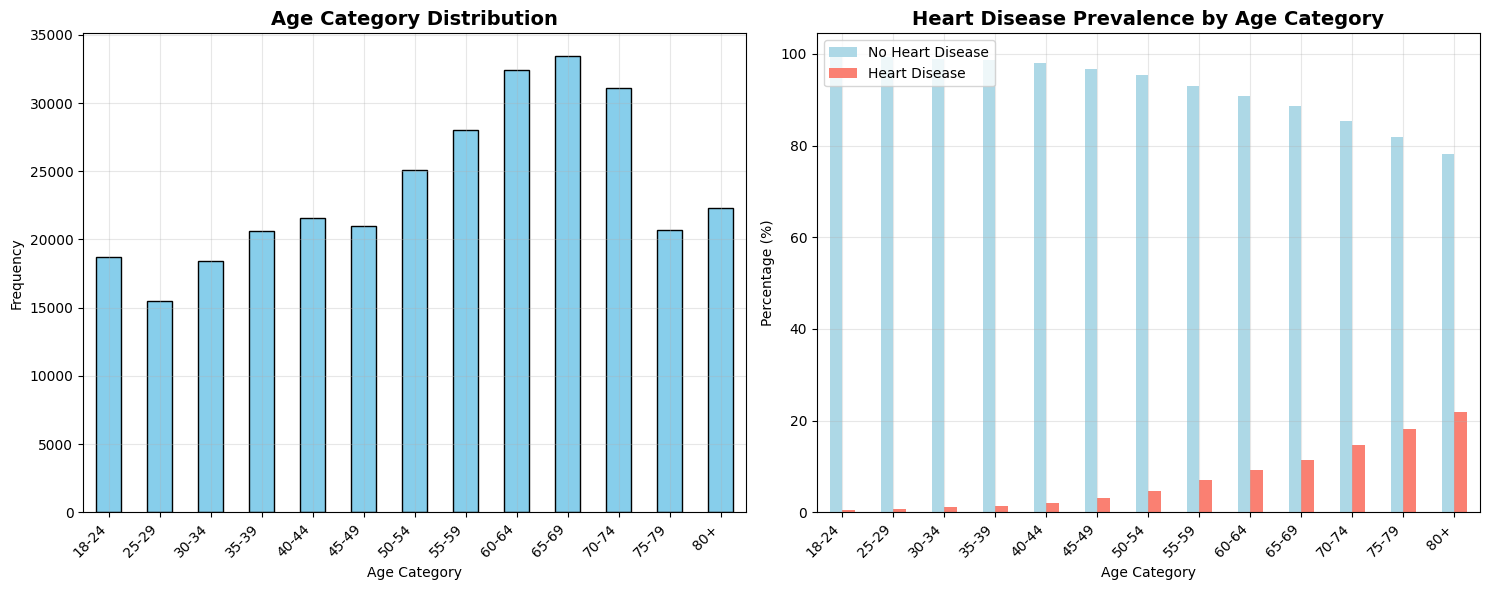

In [27]:
# =============================================================================
# 7. AGE CATEGORY ANALYSIS
# =============================================================================

print("AGE CATEGORY ANALYSIS:")
print("="*30)

# Distribution of Age_Category
print("Age distribution:")
age_dist = df['Age_Category'].value_counts().sort_index()
for age_cat, count in age_dist.items():
    print(f"  {age_cat}: {count:,} ({count/len(df)*100:.1f}%)")
    
# Visualize age distribution
plt.figure(figsize=(15, 6))
    
# Subplot 1: Bar chart
plt.subplot(1, 2, 1)
age_dist.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Age Category Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
    
# Subplot 2: Age by target variable (ROBUST VERSION)
plt.subplot(1, 2, 2)

# Create crosstab with explicit conversion
age_heart_data = []
for age_cat in df['Age_Category'].cat.categories:
    age_subset = df[df['Age_Category'] == age_cat]
    total = len(age_subset)
    if total > 0:
        # Count heart disease cases
        hd_yes = (age_subset['Heart_Disease'].astype(str).isin(['Yes', '1', 1])).sum()
        hd_no = total - hd_yes
        
        age_heart_data.append({
            'Age_Category': age_cat,
            'No Heart Disease': (hd_no / total) * 100,
            'Heart Disease': (hd_yes / total) * 100
        })

age_heart_df = pd.DataFrame(age_heart_data)
age_heart_df.set_index('Age_Category', inplace=True)

# Plot
age_heart_df.plot(kind='bar', stacked=False, color=['lightblue', 'salmon'], ax=plt.gca())
plt.title('Heart Disease Prevalence by Age Category', fontsize=14, fontweight='bold')
plt.xlabel('Age Category')
plt.ylabel('Percentage (%)')
plt.legend(['No Heart Disease', 'Heart Disease'], loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Correlation Analysis

CORRELATION ANALYSIS:


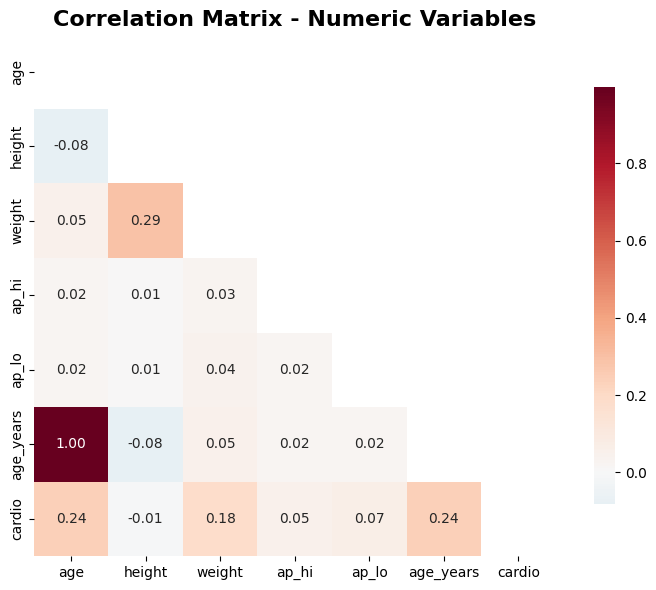


Strongest correlations with target variable:
  age            : 0.238
  age_years      : 0.238
  weight         : 0.182
  ap_lo          : 0.066
  ap_hi          : 0.054
  height         : 0.011


In [21]:
# =============================================================================
# 8. CORRELATION ANALYSIS
# =============================================================================

print("CORRELATION ANALYSIS:")
print("="*40)

# Correlation matrix for numeric variables
numeric_for_corr = [col for col in numeric_cols if col in df.columns]
if 'age_years' in df.columns:
    numeric_for_corr.append('age_years')

# Convert categorical target to numeric for correlation
df_corr = df[numeric_for_corr].copy()
if 'cardio' in df.columns:
    df_corr['cardio'] = df['cardio'].astype(int)

corr_matrix = df_corr.corr()

# Heatmap
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Hide upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Numeric Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Strongest correlations with target variable
if 'cardio' in corr_matrix.columns:
    target_corr = corr_matrix['cardio'].abs().sort_values(ascending=False)
    print("\nStrongest correlations with target variable:")
    for var, corr in target_corr.items():
        if var != 'cardio':
            print(f"  {var:15}: {corr:.3f}")

## Distribution Analysis by Target Variable

DISTRIBUTION ANALYSIS BY TARGET VARIABLE:


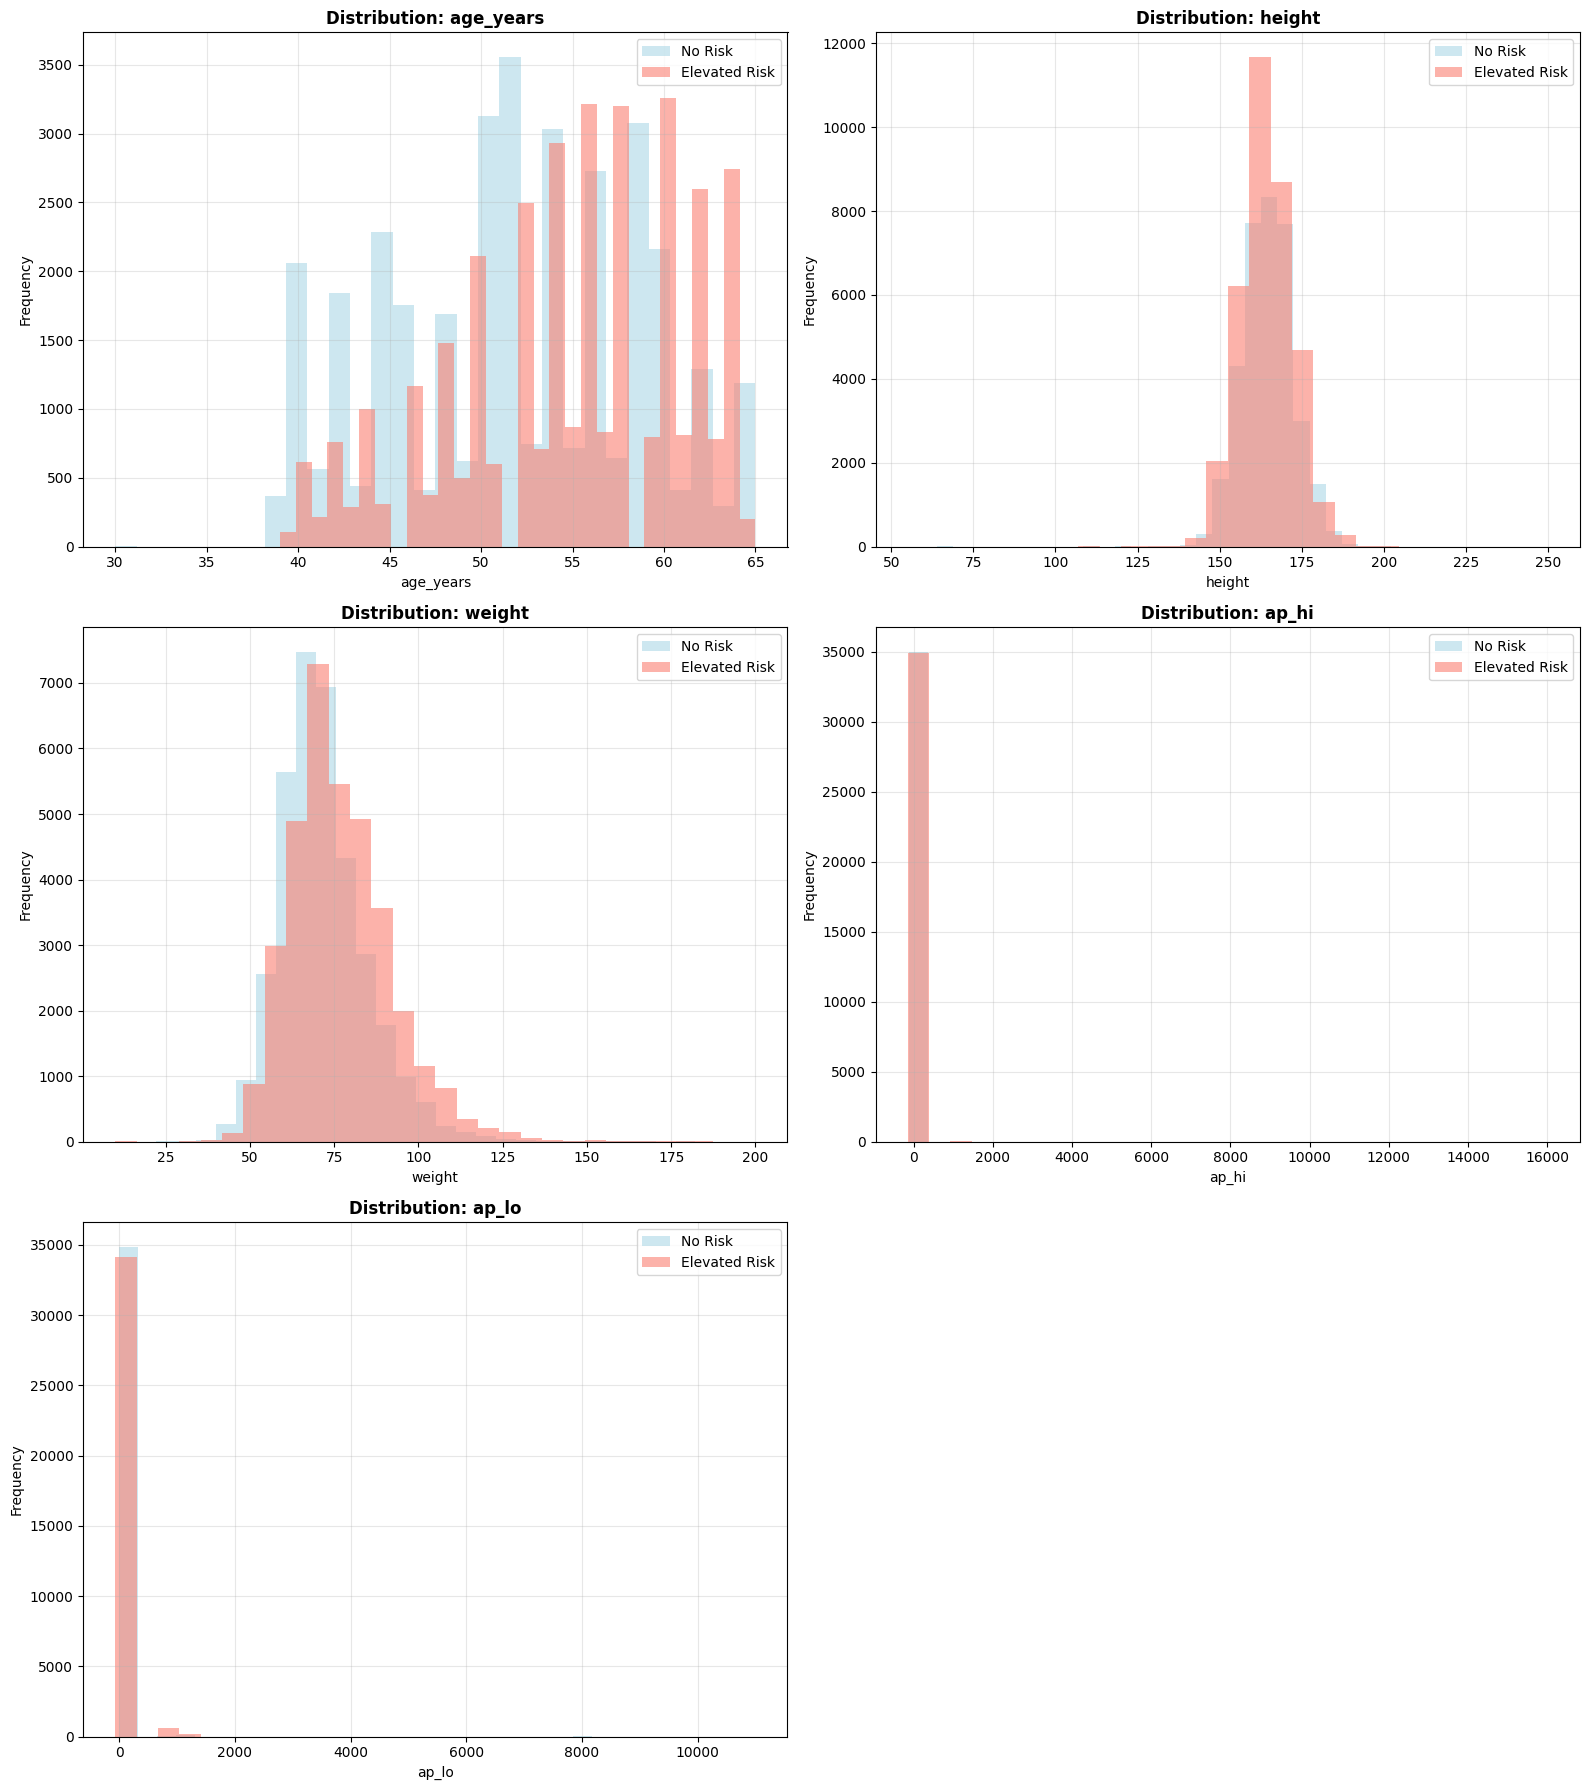

In [22]:
# =============================================================================
# 9. DISTRIBUTION ANALYSIS BY TARGET VARIABLE
# =============================================================================

print("DISTRIBUTION ANALYSIS BY TARGET VARIABLE:")
print("="*50)

# Plot important numeric variables
important_vars = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo'] if 'age_years' in df.columns else ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
important_vars = [var for var in important_vars if var in df.columns]

# Create 3x2 grid for 5 plots (6th subplot will be empty)
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.ravel()

for i, var in enumerate(important_vars[:5]):
    # Histogram for both groups
    df[df['cardio'].astype(int) == 0][var].hist(alpha=0.6, bins=30, label='No Risk', 
                                    color='lightblue', ax=axes[i])
    df[df['cardio'].astype(int) == 1][var].hist(alpha=0.6, bins=30, label='Elevated Risk', 
                                    color='salmon', ax=axes[i])
    axes[i].set_title(f'Distribution: {var}', fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

# Hide the 6th (empty) subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.show()

## Advanced Outlier Analysis

In [ ]:
# =============================================================================
# 10. ADVANCED OUTLIER ANALYSIS
# =============================================================================

print("ADVANCED OUTLIER ANALYSIS:")
print("="*60)

# Define plausibility ranges based on medical knowledge
plausibility_ranges = {
    'age_years': {
        'min': 0,
        'max': 120,
        'description': 'Biologically plausible human age range'
    },
    'height': {
        'min': 140,
        'max': 250,
        'description': 'Realistic height range in cm (very small to very tall adults)'
    },
    'weight': {
        'min': 10,
        'max': 300,
        'description': 'Realistic weight range in kg'
    },
    'ap_hi': {
        'min': 50,
        'max': 370,
        'description': 'Systolic BP: 50-370 mmHg (extreme survival limit)'
    },
    'ap_lo': {
        'min': 30,
        'max': 360,
        'description': 'Diastolic BP: 30-360 mmHg (extreme survival limit)'
    }
}

# Additional medical plausibility checks
def check_blood_pressure_plausibility(row):
    """Check if blood pressure values are medically plausible"""
    issues = []
    
    # Systolic must be higher than diastolic
    if row['ap_hi'] <= row['ap_lo']:
        issues.append('systolic <= diastolic')
    
    # Pulse pressure (difference) should be reasonable (typically 30-50 mmHg)
    pulse_pressure = row['ap_hi'] - row['ap_lo']
    if pulse_pressure < 10:
        issues.append(f'pulse_pressure too low ({pulse_pressure})')
    elif pulse_pressure > 200:
        issues.append(f'pulse_pressure too high ({pulse_pressure})')
    
    # Extremely low values (shock/critical)
    if row['ap_hi'] < 70 or row['ap_lo'] < 40:
        issues.append('critically low BP (shock range)')
    
    # Extremely high values (hypertensive crisis)
    if row['ap_hi'] > 250 or row['ap_lo'] > 150:
        issues.append('extreme hypertensive crisis')
    
    return issues

ADVANCED OUTLIER ANALYSIS:


In [24]:
# =============================================================================
# METHOD 1: PLAUSIBILITY-BASED OUTLIER DETECTION
# =============================================================================

print("\nMETHOD 1: PLAUSIBILITY-BASED OUTLIER DETECTION")
print("="*60)

plausibility_outliers = {}

for var in important_vars[:5]:
    if var in plausibility_ranges:
        ranges = plausibility_ranges[var]
        outliers = df[(df[var] < ranges['min']) | (df[var] > ranges['max'])]
        plausibility_outliers[var] = outliers
        
        print(f"\n{var.upper()}:")
        print(f"  Range: {ranges['min']} - {ranges['max']} ({ranges['description']})")
        print(f"  Outliers: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
        
        if len(outliers) > 0:
            print(f"  Min value: {df[var].min()}")
            print(f"  Max value: {df[var].max()}")
            print(f"  Values below {ranges['min']}: {(df[var] < ranges['min']).sum():,}")
            print(f"  Values above {ranges['max']}: {(df[var] > ranges['max']).sum():,}")

# Blood pressure specific checks
print("\n🩺 BLOOD PRESSURE PLAUSIBILITY CHECKS:")
print("="*60)

bp_issues = df.apply(check_blood_pressure_plausibility, axis=1)
bp_problematic = bp_issues[bp_issues.apply(len) > 0]

print(f"Total records with BP issues: {len(bp_problematic):,} ({len(bp_problematic)/len(df)*100:.2f}%)")

if len(bp_problematic) > 0:
    # Count issue types
    issue_types = {}
    for issues in bp_problematic:
        for issue in issues:
            issue_key = issue.split('(')[0].strip()  # Remove specific values
            issue_types[issue_key] = issue_types.get(issue_key, 0) + 1
    
    print("\nIssue breakdown:")
    for issue, count in sorted(issue_types.items(), key=lambda x: x[1], reverse=True):
        print(f"  • {issue}: {count:,} cases ({count/len(df)*100:.2f}%)")


METHOD 1: PLAUSIBILITY-BASED OUTLIER DETECTION

AGE_YEARS:
  Range: 0 - 120 (Biologically plausible human age range)
  Outliers: 0 (0.00%)

HEIGHT:
  Range: 50 - 250 (Realistic height range in cm (children to very tall adults))
  Outliers: 0 (0.00%)

WEIGHT:
  Range: 10 - 300 (Realistic weight range in kg)
  Outliers: 0 (0.00%)

AP_HI:
  Range: 50 - 370 (Systolic BP: 50-370 mmHg (extreme survival limit))
  Outliers: 227 (0.32%)
  Min value: -150
  Max value: 16020
  Values below 50: 188
  Values above 370: 39

AP_LO:
  Range: 30 - 360 (Diastolic BP: 30-360 mmHg (extreme survival limit))
  Outliers: 1,006 (1.44%)
  Min value: -70
  Max value: 11000
  Values below 30: 53
  Values above 360: 953

🩺 BLOOD PRESSURE PLAUSIBILITY CHECKS:
Total records with BP issues: 1,336 (1.91%)

Issue breakdown:
  • pulse_pressure too low: 1,240 cases (1.77%)
  • systolic <= diastolic: 1,236 cases (1.77%)
  • extreme hypertensive crisis: 1,015 cases (1.45%)
  • critically low BP: 243 cases (0.35%)
  • pul

In [25]:
# =============================================================================
# METHOD 2: IQR METHOD (STATISTICAL)
# =============================================================================

print("\n\nMETHOD 2: IQR METHOD (STATISTICAL)")
print("="*60)

iqr_outliers = {}

for var in important_vars[:5]:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    iqr_outliers[var] = outliers
    
    print(f"{var:15}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    print(f"                 Range: [{lower_bound:.1f}, {upper_bound:.1f}]")



METHOD 2: IQR METHOD (STATISTICAL)
age_years      : 4 outliers (0.01%)
                 Range: [33.0, 73.0]
height         : 519 outliers (0.74%)
                 Range: [142.5, 186.5]
weight         : 1,819 outliers (2.60%)
                 Range: [39.5, 107.5]
ap_hi          : 1,435 outliers (2.05%)
                 Range: [90.0, 170.0]
ap_lo          : 4,632 outliers (6.62%)
                 Range: [65.0, 105.0]


In [33]:
# =============================================================================
# METHOD 3: Z-SCORE METHOD (> 3 standard deviations)
# =============================================================================

print("\n\nMETHOD 3: Z-SCORE METHOD (|z| > 3)")
print("="*60)

zscore_outliers = {}

for var in important_vars[:5]:
    z_scores = np.abs(stats.zscore(df[var])) # type: ignore
    outliers = df[z_scores > 3]
    zscore_outliers[var] = outliers
    
    print(f"{var:15}: {len(outliers):,} outliers ({len(outliers)/len(df)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"                 Max z-score: {z_scores.max():.2f}")



METHOD 3: Z-SCORE METHOD (|z| > 3)
age_years      : 4 outliers (0.01%)
                 Max z-score: 3.45
height         : 293 outliers (0.42%)
                 Max z-score: 13.32
weight         : 702 outliers (1.00%)
                 Max z-score: 8.74
ap_hi          : 38 outliers (0.05%)
                 Max z-score: 103.18
ap_lo          : 951 outliers (1.36%)
                 Max z-score: 57.85


In [35]:
# =============================================================================
# METHOD 4: ISOLATION FOREST (MULTIVARIATE)
# =============================================================================

from sklearn.ensemble import IsolationForest

print("\n\nMETHOD 4: ISOLATION FOREST (MULTIVARIATE OUTLIER DETECTION)")
print("="*60)

# Prepare data for multivariate outlier detection
X = df[important_vars[:5]].copy()

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(X)

# -1 indicates outliers, 1 indicates inliers
n_outliers = (outlier_labels == -1).sum()
print(f"Multivariate outliers detected: {n_outliers:,} ({n_outliers/len(df)*100:.2f}%)")

df['isolation_forest_outlier'] = outlier_labels



METHOD 4: ISOLATION FOREST (MULTIVARIATE OUTLIER DETECTION)
Multivariate outliers detected: 3,500 (5.00%)


In [ ]:
# =============================================================================
# METHOD 5: RANSAC REGRESSION FOR HEIGHT-WEIGHT PLAUSIBILITY
# =============================================================================


from sklearn.linear_model import RANSACRegressor

print("\n\nMETHOD 5: RANSAC REGRESSION (HEIGHT-WEIGHT PLAUSIBILITY)")
print("="*60)

# Prepare data
X_height = df[['height']].values
y_weight = df['weight'].values

# Fit RANSAC regressor
ransac = RANSACRegressor(
    random_state=42,
    min_samples=0.5,  # Use 50% of data for initial fit
    residual_threshold=None,  # Automatically determined
    max_trials=1000
)

ransac.fit(X_height, y_weight) # type: ignore

# Get inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask

n_outliers_ransac = outlier_mask.sum()
n_inliers_ransac = inlier_mask.sum()

print("RANSAC Results:")
print(f"  Inliers (plausible combinations):  {n_inliers_ransac:,} ({n_inliers_ransac/len(df)*100:.2f}%)")
print(f"  Outliers (implausible combinations): {n_outliers_ransac:,} ({n_outliers_ransac/len(df)*100:.2f}%)")

# Add to dataframe
df['height_weight_outlier'] = outlier_mask

# Calculate residuals for all points
y_pred = ransac.predict(X_height)
residuals = np.abs(y_weight - y_pred)

# Get statistics
print("\nResidual Statistics:")
print(f"  Mean absolute residual: {residuals.mean():.2f} kg")
print(f"  Median absolute residual: {np.median(residuals):.2f} kg")
print(f"  Max residual (outliers): {residuals[outlier_mask].max():.2f} kg")
print(f"  Max residual (inliers): {residuals[inlier_mask].max():.2f} kg")




METHOD 5: RANSAC REGRESSION (HEIGHT-WEIGHT PLAUSIBILITY)
RANSAC Results:
  Inliers (plausible combinations):  32,125 (45.89%)
  Outliers (implausible combinations): 37,875 (54.11%)

Residual Statistics:
  Mean absolute residual: 10.41 kg
  Median absolute residual: 8.29 kg
  Max residual (outliers): 147.02 kg
  Max residual (inliers): 9.29 kg


## BMI Based Validation

In [37]:
# =============================================================================
# BMI-BASED VALIDATION
# =============================================================================

print("\n\nBMI-BASED VALIDATION:")
print("="*60)

# Calculate BMI for all records
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2

# WHO BMI categories
def categorize_bmi(bmi):
    if bmi < 16:
        return 'Severe Underweight'
    elif bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    elif bmi < 35:
        return 'Obese Class I'
    elif bmi < 40:
        return 'Obese Class II'
    else:
        return 'Obese Class III'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

# Compare RANSAC outliers with BMI categories
print("BMI distribution in RANSAC outliers vs inliers:")
print("\nOutliers:")
print(df[outlier_mask]['bmi_category'].value_counts())
print("\nInliers:")
print(df[inlier_mask]['bmi_category'].value_counts())

# Extreme BMI values (medical implausibility)
extreme_bmi_low = df[df['bmi'] < 10]
extreme_bmi_high = df[df['bmi'] > 60]

print("\nExtreme BMI values:")
print(f"  • BMI < 10 (medically implausible): {len(extreme_bmi_low):,}")
print(f"  • BMI > 60 (extremely rare): {len(extreme_bmi_high):,}")

if len(extreme_bmi_low) > 0 or len(extreme_bmi_high) > 0:
    print("\n  These should be reviewed for data entry errors!")



BMI-BASED VALIDATION:
BMI distribution in RANSAC outliers vs inliers:

Outliers:
bmi_category
Normal                19708
Obese Class I          9288
Obese Class II         4367
Overweight             1977
Obese Class III        1885
Underweight             590
Severe Underweight       60
Name: count, dtype: int64

Inliers:
bmi_category
Overweight         23109
Normal              6082
Obese Class I       2924
Obese Class II         9
Obese Class III        1
Name: count, dtype: int64

Extreme BMI values:
  • BMI < 10 (medically implausible): 6
  • BMI > 60 (extremely rare): 66

  These should be reviewed for data entry errors!


## Visualization



VISUALIZATION: BOXPLOTS WITH PLAUSIBILITY RANGES


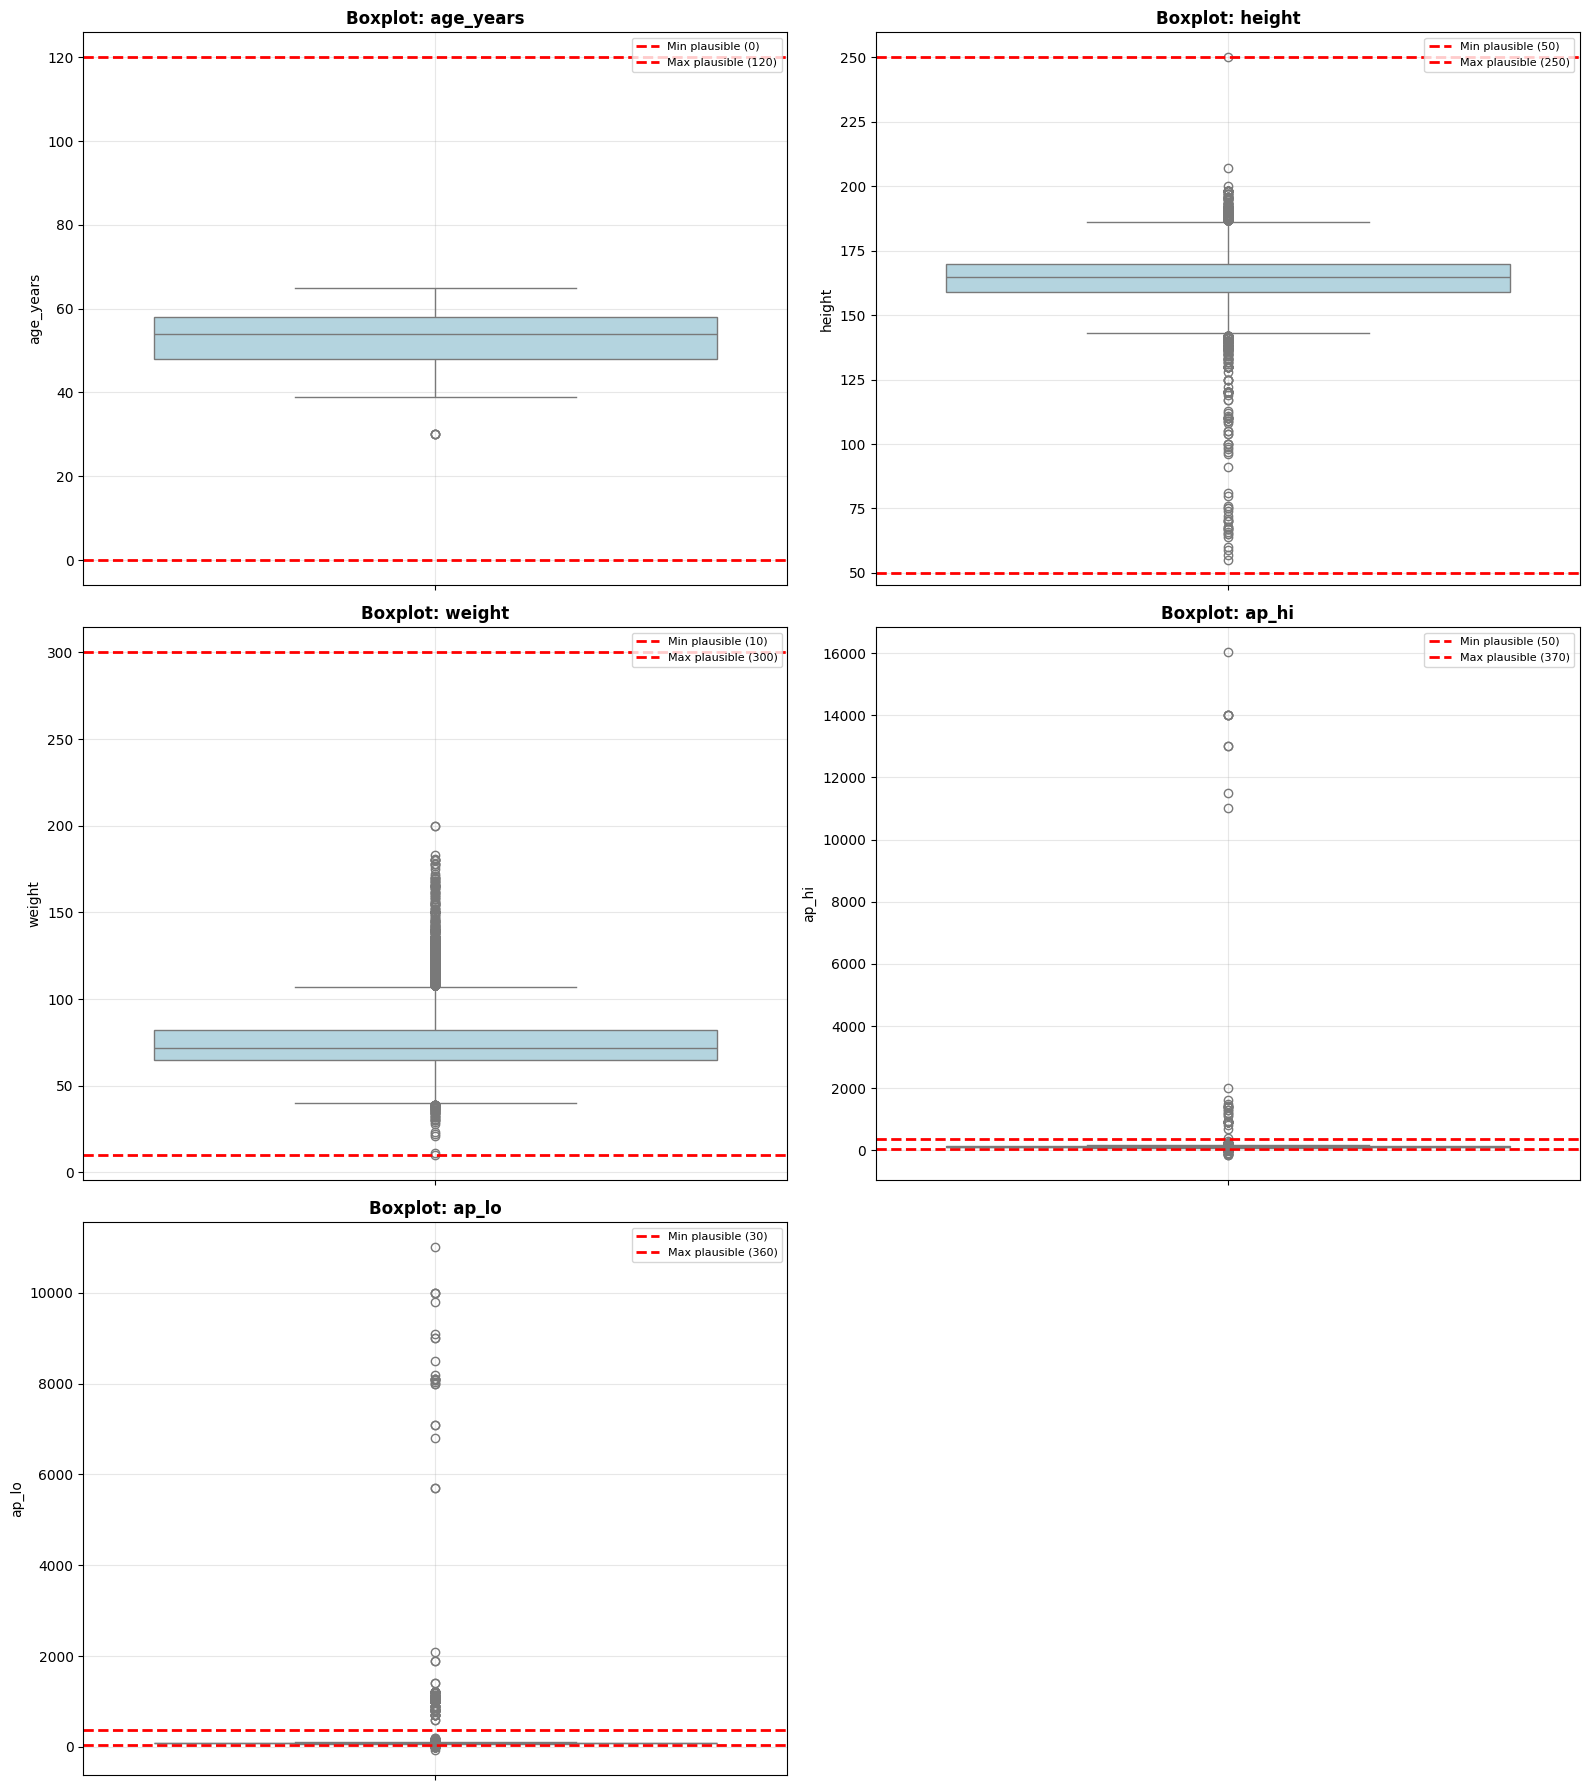

In [38]:
# =============================================================================
# VISUALIZATION: BOXPLOTS WITH PLAUSIBILITY RANGES
# =============================================================================

print("\n\nVISUALIZATION: BOXPLOTS WITH PLAUSIBILITY RANGES")
print("="*60)

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.ravel()

for i, var in enumerate(important_vars[:5]):
    # Boxplot
    sns.boxplot(data=df, y=var, ax=axes[i], color='lightblue')
    
    # Add plausibility range lines if available
    if var in plausibility_ranges:
        ranges = plausibility_ranges[var]
        axes[i].axhline(y=ranges['min'], color='red', linestyle='--', 
                       linewidth=2, label=f"Min plausible ({ranges['min']})")
        axes[i].axhline(y=ranges['max'], color='red', linestyle='--', 
                       linewidth=2, label=f"Max plausible ({ranges['max']})")
    
    axes[i].set_title(f'Boxplot: {var}', fontweight='bold', fontsize=12)
    axes[i].legend(loc='upper right', fontsize=8)
    axes[i].grid(True, alpha=0.3)

# Hide the 6th (empty) subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.show()


VISUALIZATION: HEIGHT-WEIGHT RELATIONSHIP WITH RANSAC


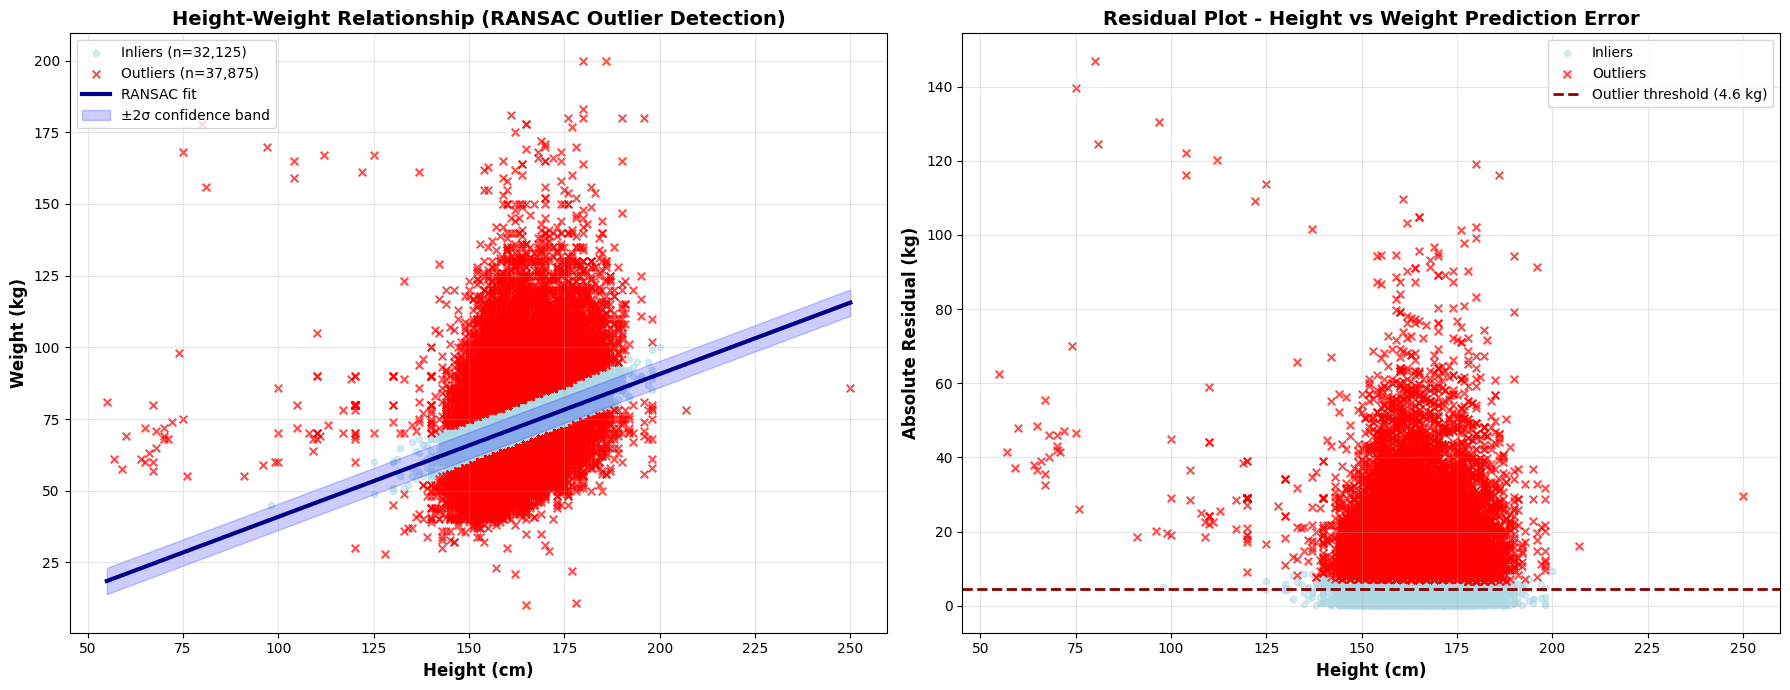

In [39]:
# =============================================================================
# VISUALIZATION: HEIGHT-WEIGHT RELATIONSHIP WITH RANSAC
# =============================================================================

print("\nVISUALIZATION: HEIGHT-WEIGHT RELATIONSHIP WITH RANSAC")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Scatter plot with RANSAC fit
ax1 = axes[0]

# Plot inliers and outliers
ax1.scatter(df.loc[inlier_mask, 'height'], 
           df.loc[inlier_mask, 'weight'],
           c='lightblue', alpha=0.5, s=20, label=f'Inliers (n={n_inliers_ransac:,})')
ax1.scatter(df.loc[outlier_mask, 'height'], 
           df.loc[outlier_mask, 'weight'],
           c='red', alpha=0.7, s=30, marker='x', label=f'Outliers (n={n_outliers_ransac:,})')

# Plot RANSAC regression line
line_X = np.linspace(df['height'].min(), df['height'].max(), 100).reshape(-1, 1)
line_y = ransac.predict(line_X)
ax1.plot(line_X, line_y, color='darkblue', linewidth=3, label='RANSAC fit')

# Add confidence bands (±2 std of inlier residuals)
inlier_residuals_std = residuals[inlier_mask].std()
ax1.fill_between(line_X.ravel(), 
                 line_y - 2*inlier_residuals_std, 
                 line_y + 2*inlier_residuals_std,
                 alpha=0.2, color='blue', label='±2σ confidence band')

ax1.set_xlabel('Height (cm)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Weight (kg)', fontsize=12, fontweight='bold')
ax1.set_title('Height-Weight Relationship (RANSAC Outlier Detection)', 
             fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Residual plot
ax2 = axes[1]

ax2.scatter(df.loc[inlier_mask, 'height'], 
           residuals[inlier_mask],
           c='lightblue', alpha=0.5, s=20, label='Inliers')
ax2.scatter(df.loc[outlier_mask, 'height'], 
           residuals[outlier_mask],
           c='red', alpha=0.7, s=30, marker='x', label='Outliers')

# Add threshold line
threshold = inlier_residuals_std * 2
ax2.axhline(y=threshold, color='darkred', linestyle='--', linewidth=2, 
           label=f'Outlier threshold ({threshold:.1f} kg)')

ax2.set_xlabel('Height (cm)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Absolute Residual (kg)', fontsize=12, fontweight='bold')
ax2.set_title('Residual Plot - Height vs Weight Prediction Error', 
             fontsize=14, fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Detailed Outlier Analysis


In [40]:
# =============================================================================
# DETAILED OUTLIER ANALYSIS
# =============================================================================

print("\n\nDETAILED HEIGHT-WEIGHT OUTLIER ANALYSIS:")
print("="*60)

# Analyze outlier characteristics
outlier_df = df[outlier_mask][['height', 'weight', 'age_years', 'gender', 'cardio']].copy()
outlier_df['predicted_weight'] = y_pred[outlier_mask]
outlier_df['residual'] = residuals[outlier_mask]

print("\nTop 10 most extreme outliers:")
top_outliers = outlier_df.nlargest(10, 'residual')
display(top_outliers[['height', 'weight', 'predicted_weight', 'residual', 'age_years', 'gender']])

# Categorize outliers
print("\nOutlier Categories:")

# Underweight outliers (weight much lower than expected)
underweight_outliers = outlier_df[outlier_df['weight'] < outlier_df['predicted_weight']]
print(f"  • Underweight outliers: {len(underweight_outliers):,} ({len(underweight_outliers)/len(df)*100:.2f}%)")

# Overweight outliers (weight much higher than expected)
overweight_outliers = outlier_df[outlier_df['weight'] > outlier_df['predicted_weight']]
print(f"  • Overweight outliers: {len(overweight_outliers):,} ({len(overweight_outliers)/len(df)*100:.2f}%)")

# Extreme cases (residual > 50 kg)
extreme_outliers = outlier_df[outlier_df['residual'] > 50]
print(f"  • Extreme cases (>50kg deviation): {len(extreme_outliers):,} ({len(extreme_outliers)/len(df)*100:.2f}%)")



DETAILED HEIGHT-WEIGHT OUTLIER ANALYSIS:

Top 10 most extreme outliers:


,height,weight,predicted_weight,residual,age_years,gender
27384,80,178.0,30.976912,147.023088,42,1
12770,75,168.0,28.488117,139.511883,54,1
8171,97,170.0,39.438814,130.561186,48,2
23913,81,156.0,31.474671,124.525329,52,1
59625,104,165.0,42.923126,122.076874,48,1
20028,112,167.0,46.905198,120.094802,54,1
50413,180,200.0,80.752805,119.247195,41,2
435,186,200.0,83.739359,116.260641,46,1
45358,104,159.0,42.923126,116.076874,54,1
15366,125,167.0,53.376064,113.623936,48,1



Outlier Categories:
  • Underweight outliers: 20,868 (29.81%)
  • Overweight outliers: 17,007 (24.30%)
  • Extreme cases (>50kg deviation): 401 (0.57%)


## Combined Outlier Summary

In [41]:
# =============================================================================
# COMBINED OUTLIER SUMMARY
# =============================================================================

print("\n\nCOMBINED OUTLIER SUMMARY (ALL METHODS):")
print("="*80)

outlier_summary_data = []

for var in important_vars[:5]:
    row = {
        'Variable': var,
        'Plausibility': len(plausibility_outliers.get(var, [])),
        'IQR': len(iqr_outliers.get(var, [])),
        'Z-Score': len(zscore_outliers.get(var, []))
    }
    outlier_summary_data.append(row)

# Add RANSAC and multivariate
if 'Height_(cm)' in df.columns and 'Weight_(kg)' in df.columns:
    outlier_summary_data.append({
        'Variable': 'Height-Weight (RANSAC)',
        'Plausibility': n_outliers_ransac,
        'IQR': '-',
        'Z-Score': '-'
    })

outlier_summary_data.append({
    'Variable': 'Multivariate (Isolation Forest)',
    'Plausibility': n_outliers,
    'IQR': '-',
    'Z-Score': '-'
})

outlier_summary_df = pd.DataFrame(outlier_summary_data)
display(outlier_summary_df)



COMBINED OUTLIER SUMMARY (ALL METHODS):


,Variable,Plausibility,IQR,Z-Score
0,age_years,0,4,4
1,height,0,519,293
2,weight,0,1819,702
3,ap_hi,227,1435,38
4,ap_lo,1006,4632,951
5,Multivariate (Isolation Forest),3500,-,-
